In [1]:
from matplotlib import pyplot as plt
import numpy as np

## Load data

In [16]:
energies_hee = np.load('../local_data/energies_cnot_1.npy')
convergences_hee = np.load('../local_data/convergences_cnot_1.npy')
grads_hee = np.load('../local_data/grad_norms_cnot_1.npy')
grad_variances_hee = np.load('../local_data/grad_variances_cnot_1.npy')

In [ ]:
energies_ng = np.load('../local_data/energies_cnot_2.npy')
convergences_ng = np.load('../local_data/convergences_cnot_2.npy')
grads_ng = np.load('../local_data/grad_norms_cnot_2.npy')
grad_variances_ng = np.load('../local_data/grad_variances_cnot_2.npy')

## Plots


In [17]:
mean_en = np.min(energies_hee, axis=1)[:,-1]

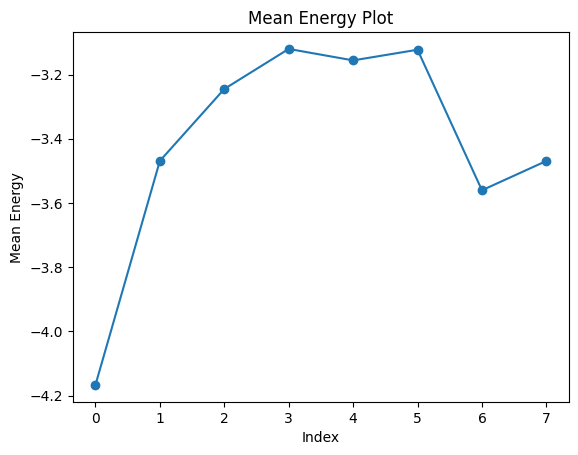

In [18]:
plt.plot(mean_en, marker='o')
plt.xlabel('Index')
plt.ylabel('Mean Energy')
plt.title('Mean Energy Plot')
plt.show()